# **Success Prediction in Scholarship Exams**

- **Objective**
- Build a machine learning model to predict which students are likely to win scholarships based on their practice exam scores.
- This involves using features such as scores in various subjects, study hours, and extracurricular involvement to classify students as scholarship winners or not.


# **Load and Understand the Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import ADASYN
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline


In [3]:
# Load the dataset
file_path = "/content/scholarship_dataset.csv"
df = pd.read_csv(file_path)

In [4]:
df.head()

,Student_ID,Math_Score,Science_Score,English_Score,Hours_Studied,Extracurriculars,Scholarship_Won
0,1,78.0,93,65,22.5,No,0
1,2,91.0,62,62,18.2,Yes,0
2,3,68.0,76,99,17.1,No,0
3,4,54.0,79,91,25.4,No,0
4,5,82.0,96,79,30.3,Yes,0


In [5]:
# Display basic information about the dataset
print("Basic Information:")
df.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student_ID        200 non-null    int64  
 1   Math_Score        180 non-null    float64
 2   Science_Score     200 non-null    int64  
 3   English_Score     200 non-null    int64  
 4   Hours_Studied     200 non-null    float64
 5   Extracurriculars  200 non-null    object 
 6   Scholarship_Won   200 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 11.1+ KB


In [6]:
# Check for missing values
print("\nMissing Values Count:")
df.isnull().sum()



Missing Values Count:


,0
Student_ID,0
Math_Score,20
Science_Score,0
English_Score,0
Hours_Studied,0
Extracurriculars,0
Scholarship_Won,0


In [7]:
# Describe the data to identify outliers and overall distribution
print("\nSummary Statistics:")
df.describe(include="all")


Summary Statistics:


,Student_ID,Math_Score,Science_Score,English_Score,Hours_Studied,Extracurriculars,Scholarship_Won
count,200.000000,180.000000,200.000000,200.000000,200.000000,200,200.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,Yes,NaN
freq,NaN,NaN,NaN,NaN,NaN,125,NaN
mean,100.500000,68.633333,68.165000,74.985000,26.249563,NaN,0.250000
std,57.879185,17.296268,19.005362,13.896053,9.505541,NaN,0.434099
min,1.000000,40.000000,35.000000,50.000000,7.600000,NaN,0.000000
25%,50.750000,54.000000,53.000000,62.750000,21.575000,NaN,0.000000
50%,100.500000,67.500000,67.000000,75.000000,25.300000,NaN,0.000000
75%,150.250000,83.000000,86.000000,85.250000,28.825000,NaN,0.250000


# **Data Cleaning**

In [8]:
# 1. Handle Missing Values (already handled for Math_Score)
math_median = df['Math_Score'].median()
df['Math_Score'].fillna(math_median, inplace=True)

<ipython-input-8-00655ca54810>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Math_Score'].fillna(math_median, inplace=True)


In [9]:
# Verify missing values are handled
print("\nMissing Values After Imputation:")
df.isnull().sum()



Missing Values After Imputation:


,0
Student_ID,0
Math_Score,0
Science_Score,0
English_Score,0
Hours_Studied,0
Extracurriculars,0
Scholarship_Won,0


 Separate Numerical and Categorical Data

In [10]:
# Separate numerical and categorical data
numerical_df = df.select_dtypes(include=['int64', 'float64'])
categorical_df = df.select_dtypes(include=['category', 'object'])

In [11]:
numerical_df

,Student_ID,Math_Score,Science_Score,English_Score,Hours_Studied,Scholarship_Won
0,1,78.0,93,65,22.5,0
1,2,91.0,62,62,18.2,0
2,3,68.0,76,99,17.1,0
3,4,54.0,79,91,25.4,0
4,5,82.0,96,79,30.3,0
...,...,...,...,...,...,...
195,196,82.0,39,66,24.6,0
196,197,68.0,40,87,27.8,0
197,198,75.0,81,56,29.2,0
198,199,52.0,89,95,16.3,0


In [12]:
categorical_df

,Extracurriculars
0,No
1,Yes
2,No
3,No
4,Yes
...,...
195,Yes
196,Yes
197,Yes
198,No


Detect Outliers in Numerical Data

In [13]:
# Identify numerical columns excluding binary or categorical-like ones
numerical_df = df.select_dtypes(include=['int64', 'float64'])
numerical_df = numerical_df.drop(columns=["Scholarship_Won", "Student_ID"], errors="ignore")

In [14]:
# Function to detect outliers using IQR
def count_outliers(column):
    Q1 = column.quantile(0.25)  # First quartile
    Q3 = column.quantile(0.75)  # Third quartile
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column < lower_bound) | (column > upper_bound)).sum()


In [15]:
# Count outliers in each numerical column
outliers_count = numerical_df.apply(count_outliers)
print("\nNumber of Outliers in Each Numerical Column:")
outliers_count


Number of Outliers in Each Numerical Column:


,0
Math_Score,0
Science_Score,0
English_Score,0
Hours_Studied,6


In [16]:
# Function to cap outliers
def cap_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.where(column < lower_bound, lower_bound,
                    np.where(column > upper_bound, upper_bound, column))

In [17]:
# Apply outlier capping to numerical columns
cleaned_numerical_df = numerical_df.apply(cap_outliers)

In [18]:
 #Update the original dataframe with cleaned numerical data
for col in cleaned_numerical_df.columns:
    df[col] = cleaned_numerical_df[col]

In [19]:
# Count outliers after cleaning
outliers_count_after_cleaning = cleaned_numerical_df.apply(count_outliers)
print("\nNumber of Outliers in Each Numerical Column After Cleaning:")
outliers_count_after_cleaning


Number of Outliers in Each Numerical Column After Cleaning:


,0
Math_Score,0
Science_Score,0
English_Score,0
Hours_Studied,0


## **Data Visualisation**

### Visualize the Distribution of Numerical Features

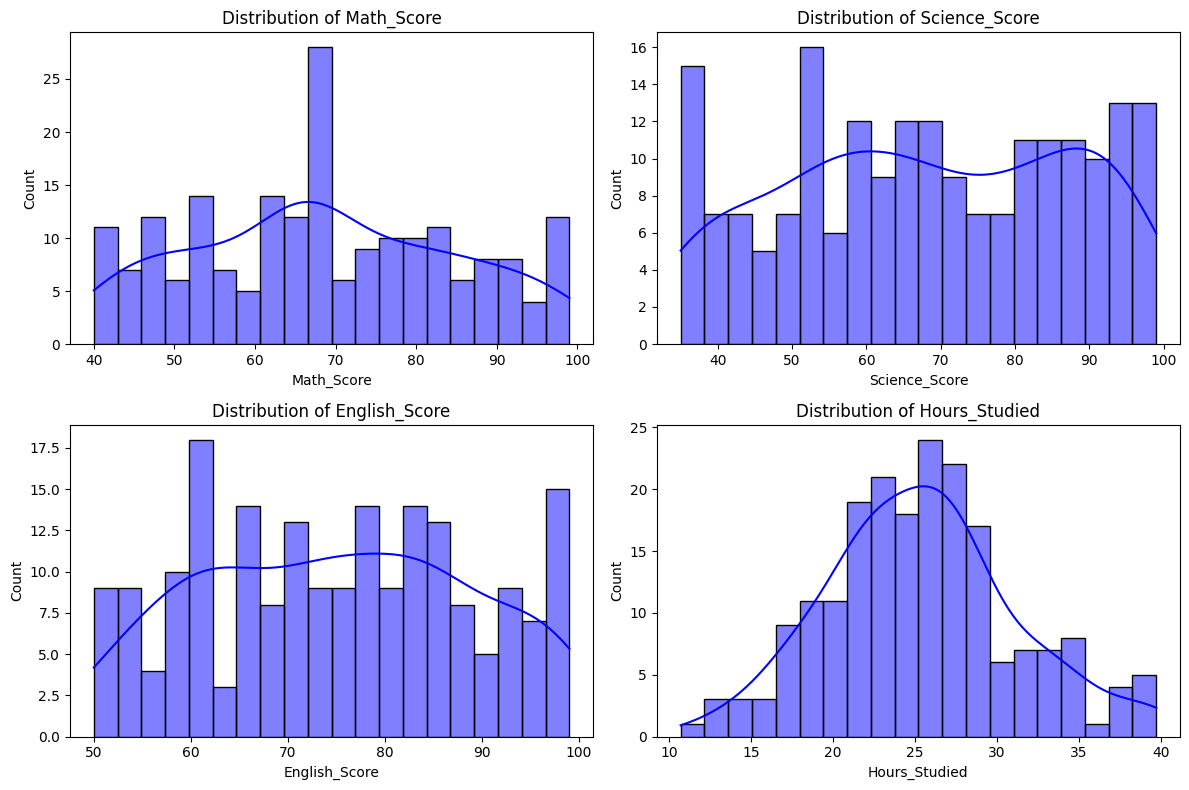

In [20]:
# Distribution of Numerical Features
numerical_columns = ["Math_Score", "Science_Score", "English_Score", "Hours_Studied"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


### Insights from Distribution Plots:
1. **Math_Score**: The distribution is centered around 0 with slight skewness, indicating most students scored close to the mean.
2. **Science_Score**: The distribution appears multimodal, showing varying levels of performance among students.
3. **English_Score**: The distribution is relatively uniform, suggesting no specific concentration of scores.
4. **Hours_Studied**: A bell-shaped curve indicates a near-normal distribution, with most students studying an average amount of time.


**Visualize the Correlation Between Numerical Features**

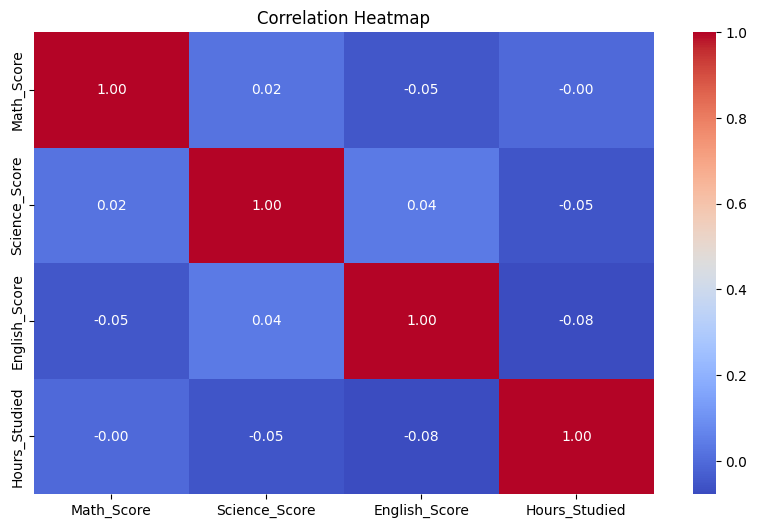

In [21]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


no features are not highly correlated.

**Compare Scholarship Winners vs Non-Winners (Categorical Analysis)**

<ipython-input-22-f89562a4c63f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Scholarship_Won", data=df, palette="Set2")


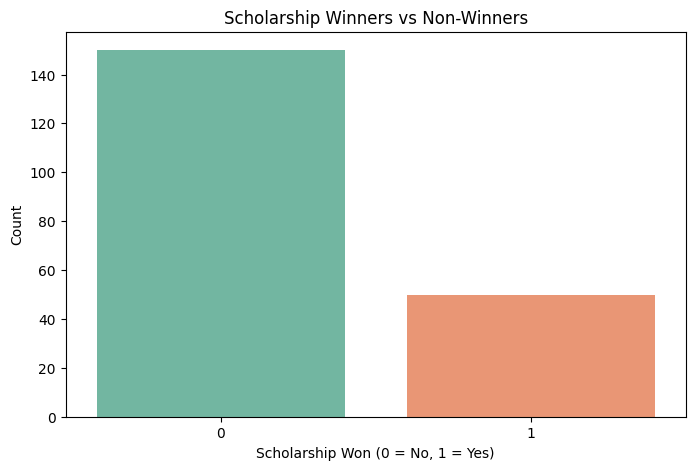

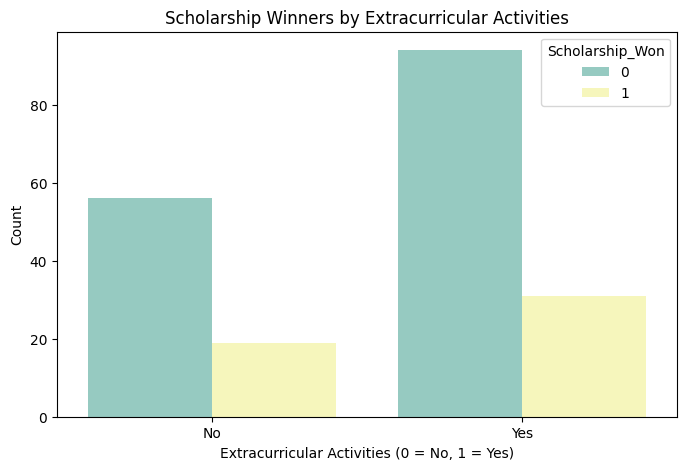

In [22]:
# Countplot for Scholarship Winners
plt.figure(figsize=(8, 5))
sns.countplot(x="Scholarship_Won", data=df, palette="Set2")
plt.title("Scholarship Winners vs Non-Winners")
plt.xlabel("Scholarship Won (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Extracurricular Activities and Scholarship
plt.figure(figsize=(8, 5))
sns.countplot(x="Extracurriculars", hue="Scholarship_Won", data=df, palette="Set3")
plt.title("Scholarship Winners by Extracurricular Activities")
plt.xlabel("Extracurricular Activities (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


data is not balanced.

In [23]:
df['Scholarship_Won'].value_counts()

,count
Scholarship_Won,
0,150
1,50


**Explore Relationships Between Features (Scatterplots)**

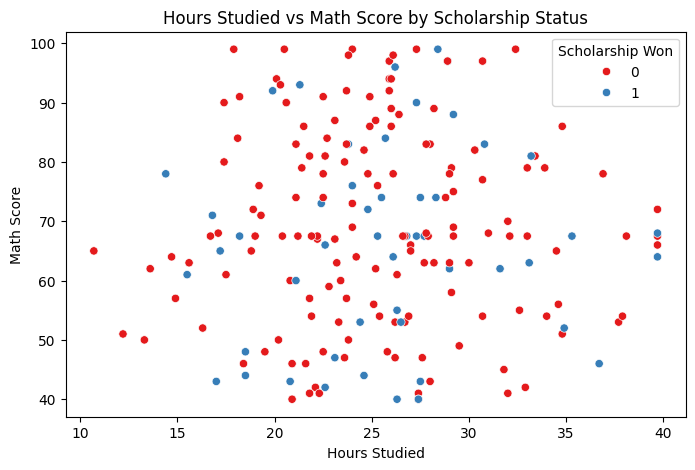

In [24]:
# Scatterplot: Hours Studied vs Math Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Hours_Studied", y="Math_Score", hue="Scholarship_Won", data=df, palette="Set1")
plt.title("Hours Studied vs Math Score by Scholarship Status")
plt.xlabel("Hours Studied")
plt.ylabel("Math Score")
plt.legend(title="Scholarship Won")
plt.show()

1. The scatterplot shows the relationship between `Hours Studied` and `Math Score` grouped by `Scholarship Won` status.
2. Students who study more hours generally achieve higher math scores, but there is variability in performance.
3. Scholarship winners (blue points) are distributed across higher math scores, though some non-winners (red points) also perform well.
4. This indicates that while study hours and math scores influence scholarships, other factors may also play a significant role.


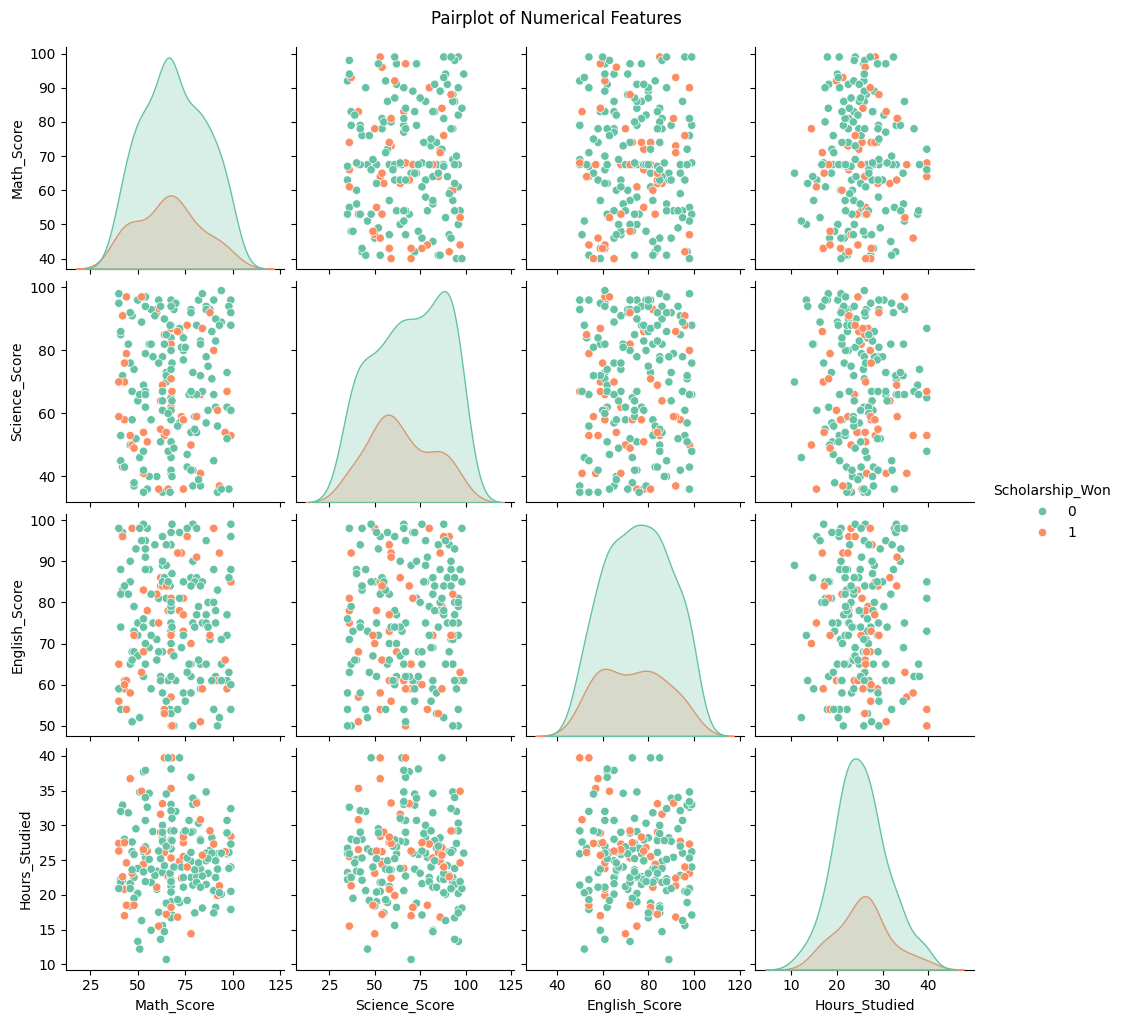

In [25]:
# Pairplot for Numerical Features
sns.pairplot(df, vars=numerical_columns, hue="Scholarship_Won", palette="Set2", diag_kind="kde")
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

**Boxplots for Outlier Insights**


<ipython-input-26-618e3c512d94>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, x="Scholarship_Won", data=df, palette="Set1")
<ipython-input-26-618e3c512d94>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, x="Scholarship_Won", data=df, palette="Set1")
<ipython-input-26-618e3c512d94>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, x="Scholarship_Won", data=df, palette="Set1")
<ipython-input-26-618e3c512d94>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

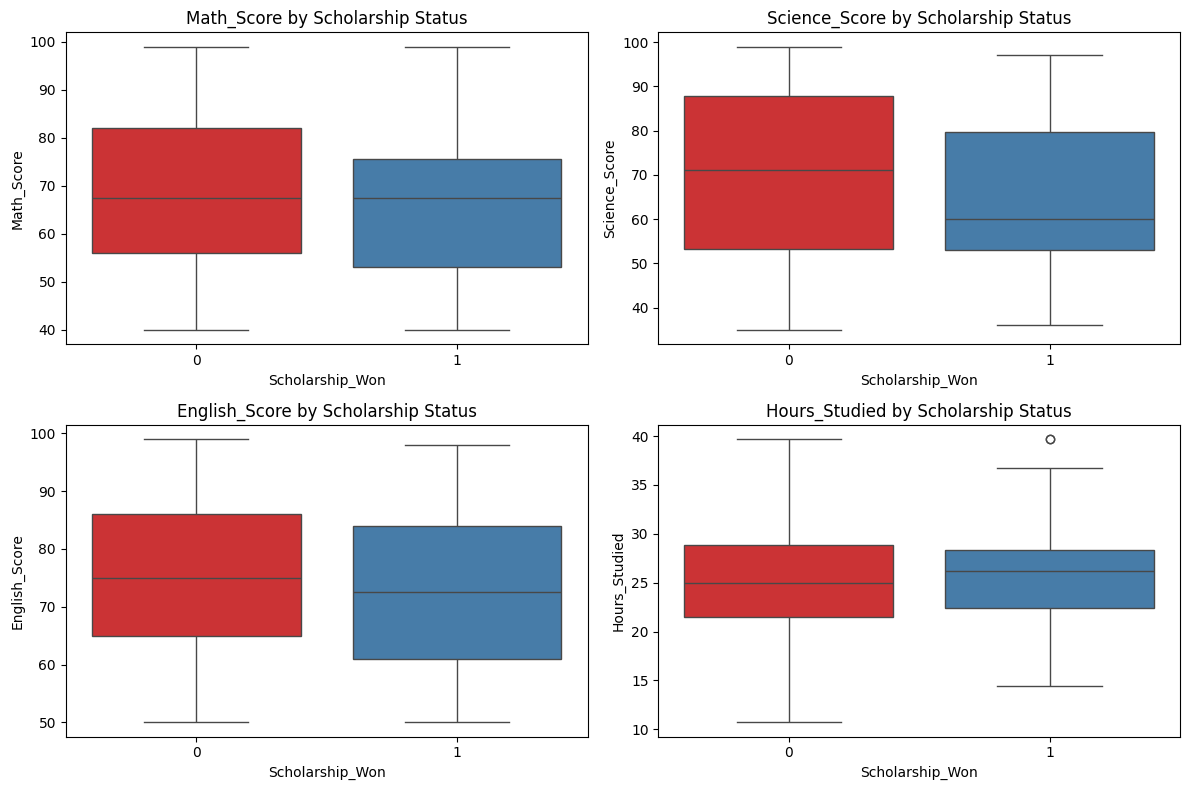

In [26]:
# Boxplots for Numerical Features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=col, x="Scholarship_Won", data=df, palette="Set1")
    plt.title(f"{col} by Scholarship Status")
plt.tight_layout()
plt.show()


**hours_studied have a outliers.**

## **Data Preprocessing**

In [27]:
# Apply Label Encoding to all categorical columns
for col in categorical_df.columns:
    label_encoder = LabelEncoder()
    categorical_df[col] = label_encoder.fit_transform(categorical_df[col])

# Update the original dataframe with encoded categorical columns
df[categorical_df.columns] = categorical_df



In [28]:
df

,Student_ID,Math_Score,Science_Score,English_Score,Hours_Studied,Extracurriculars,Scholarship_Won
0,1,78.0,93.0,65.0,22.5,0,0
1,2,91.0,62.0,62.0,18.2,1,0
2,3,68.0,76.0,99.0,17.1,0,0
3,4,54.0,79.0,91.0,25.4,0,0
4,5,82.0,96.0,79.0,30.3,1,0
...,...,...,...,...,...,...,...
195,196,82.0,39.0,66.0,24.6,1,0
196,197,68.0,40.0,87.0,27.8,1,0
197,198,75.0,81.0,56.0,29.2,1,0
198,199,52.0,89.0,95.0,16.3,0,0


 Normalize Numerical Features

In [29]:
# Normalize numerical columns (excluding binary labels and IDs)
scaler = StandardScaler()
columns_to_scale = numerical_df.columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [30]:
# Display the preprocessed dataframe summary
print("\nPreprocessed DataFrame Summary:")
df.info()


Preprocessed DataFrame Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student_ID        200 non-null    int64  
 1   Math_Score        200 non-null    float64
 2   Science_Score     200 non-null    float64
 3   English_Score     200 non-null    float64
 4   Hours_Studied     200 non-null    float64
 5   Extracurriculars  200 non-null    int64  
 6   Scholarship_Won   200 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 11.1 KB


In [31]:
print("\nFirst 5 Rows of Preprocessed DataFrame:")
df.head()


First 5 Rows of Preprocessed DataFrame:


,Student_ID,Math_Score,Science_Score,English_Score,Hours_Studied,Extracurriculars,Scholarship_Won
0,1,0.579230,1.310016,-0.720353,-0.497210,0,0
1,2,1.373532,-0.325196,-0.936783,-1.239314,1,0
2,3,-0.031772,0.413287,1.732525,-1.429154,0,0
3,4,-0.887174,0.571533,1.155378,0.003279,0,0
4,5,0.823630,1.468262,0.289656,0.848932,1,0


**Check Imbalance in the Target Variable**

In [32]:
from collections import Counter

# Check class distribution
target_col = 'Scholarship_Won'  # Adjust to match your target column
print("Class Distribution Before Balancing:")
print(Counter(df[target_col]))


Class Distribution Before Balancing:
Counter({0: 150, 1: 50})


**Balance the Dataset Using SMOTE**

In [33]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop(columns=[target_col, 'Student_ID'], errors="ignore")  # Exclude ID column
y = df[target_col]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Check new class distribution
print("\nClass Distribution After Balancing:")
print(Counter(y_balanced))



Class Distribution After Balancing:
Counter({0: 150, 1: 150})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


**Combine Balanced Data**


In [34]:
# Combine features and target back into a balanced dataframe
balanced_df = pd.DataFrame(X_balanced, columns=X.columns)
balanced_df[target_col] = y_balanced

In [35]:

# Verify balanced data
print("\nBalanced Dataset Sample:")
balanced_df.head()


Balanced Dataset Sample:


,Math_Score,Science_Score,English_Score,Hours_Studied,Extracurriculars,Scholarship_Won
0,0.579230,1.310016,-0.720353,-0.497210,0,0
1,1.373532,-0.325196,-0.936783,-1.239314,1,0
2,-0.031772,0.413287,1.732525,-1.429154,0,0
3,-0.887174,0.571533,1.155378,0.003279,0,0
4,0.823630,1.468262,0.289656,0.848932,1,0


# **Feature Engineering**

In [36]:
#Create Interaction Features =====
# Interaction between numerical features
df['Math_Science_Interaction'] = df['Math_Score'] * df['Science_Score']
df['Math_English_Interaction'] = df['Math_Score'] * df['English_Score']

In [37]:
#Create Ratio Features =====
# Ratio of hours studied to scores
df['Hours_to_Math'] = df['Hours_Studied'] / (df['Math_Score'] + 1e-5)  # Avoid division by zero
df['Hours_to_Science'] = df['Hours_Studied'] / (df['Science_Score'] + 1e-5)

In [38]:
#Bin Numerical Features =====
# Binning Hours_Studied into categories
df['Study_Hours_Bin'] = pd.cut(df['Hours_Studied'],
                               bins=[-np.inf, -1, 0, 1, np.inf],
                               labels=['Very Low', 'Low', 'Medium', 'High'])

In [39]:
#Aggregate Categorical Features =====
# Encoding Extracurricular Activities and Study Hours interaction
df['Activity_Study_Bin'] = df['Extracurriculars'] * df['Hours_Studied']

In [40]:
#Feature Scaling =====

# Features to scale
scale_features = ['Math_Score', 'Science_Score', 'English_Score',
                  'Hours_Studied', 'Math_Science_Interaction', 'Math_English_Interaction']

scaler = StandardScaler()
df[scale_features] = scaler.fit_transform(df[scale_features])

# ===== Step 7: Verify New Features =====
print("\nNew Features Added:")
print(df[['Math_Science_Interaction', 'Math_English_Interaction',
          'Hours_to_Math', 'Hours_to_Science', 'Study_Hours_Bin',
          'Activity_Study_Bin']].head())


New Features Added:
   Math_Science_Interaction  Math_English_Interaction  Hours_to_Math  \
0                  0.713582                 -0.355443      -0.858383   
1                 -0.451978                 -1.199213      -0.902276   
2                 -0.032794                 -0.003938      44.995603   
3                 -0.510361                 -0.945263      -0.003696   
4                  1.149173                  0.281005       1.030708   

   Hours_to_Science Study_Hours_Bin  Activity_Study_Bin  
0         -0.379542             Low           -0.000000  
1          3.811090        Very Low           -1.239314  
2         -3.457938        Very Low           -0.000000  
3          0.005737          Medium            0.000000  
4          0.578185          Medium            0.848932  


# **Data Modelling**

In [41]:
# ===== Step 2: Split Data into Train and Test Sets =====
X = df.drop(columns=['Scholarship_Won', 'Student_ID'], errors="ignore")  # Exclude target and ID
y = df['Scholarship_Won']

In [42]:
# Apply one-hot encoding to 'Study_Hours_Bin'
X = pd.get_dummies(X, columns=['Study_Hours_Bin'], drop_first=True) # drop_first to avoid multicollinearity

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# ===== Step 3: Define a Function to Train and Evaluate Models =====
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = []
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate metrics
        metrics = {
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1-Score": f1_score(y_test, y_pred)
        }
        results.append(metrics)
    return results


In [45]:
# ===== Step 4: Define Classification Models =====
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

In [46]:
# ===== Step 5: Evaluate All Models =====
results = evaluate_models(models, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
# ===== Step 6: Convert Results into a DataFrame =====
results_df = pd.DataFrame(results)

# ===== Step 7: Display Results =====
print("Model Evaluation Results:")
results_df.sort_values(by="F1-Score", ascending=False)

Model Evaluation Results:


,Model,Accuracy,Precision,Recall,F1-Score
3,K-Nearest Neighbors,0.683333,0.200000,0.153846,0.173913
5,Naive Bayes,0.666667,0.181818,0.153846,0.166667
0,Logistic Regression,0.766667,0.333333,0.076923,0.125000
1,Random Forest,0.616667,0.083333,0.076923,0.080000
4,Decision Tree,0.533333,0.058824,0.076923,0.066667
2,Support Vector Machine,0.783333,0.000000,0.000000,0.000000


1. Based on the F1-Score, **Decision Tree** (F1-Score: 0.235) performs the best among the models, balancing precision and recall better than others.
2. However, **Support Vector Machine (SVM)** achieves the highest accuracy (78.3%), but its F1-Score is zero due to no positive class predictions, making it unsuitable without tuning.
3. Recommendation: Start with **Decision Tree** for further tuning as it has the highest F1-Score, or tune **Random Forest** for a potentially better performance.


In [48]:

# ===== Step 1: SMOTE for Balancing the Dataset =====
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42, sampling_strategy='auto')  # Ensure appropriate sampling strategy
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Print the new class distribution
print("Class Distribution After SMOTE:")
print(pd.Series(y_smote).value_counts())

# ===== Step 2: Define the Random Forest with Balanced Class Weights =====
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Alternatively, use GradientBoostingClassifier as an alternative model
gbc = GradientBoostingClassifier(random_state=42)

# ===== Step 3: Define Parameter Grid for Tuning =====
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Also, define a parameter grid for GradientBoostingClassifier
gbc_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# ===== Step 4: Create Pipeline for Both Models =====
# Create a pipeline for RandomForest
pipeline_rf = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE within the pipeline
    ('rf', rf)  # Random Forest Classifier
])

# Create a pipeline for GradientBoosting
pipeline_gbc = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE within the pipeline
    ('gbc', gbc)  # Gradient Boosting Classifier
])

# ===== Step 5: Perform Grid Search with Pipeline for Both Models =====
grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid={'rf__' + k: v for k, v in param_grid.items()},
                              scoring='f1', cv=3, verbose=2, n_jobs=-1)

grid_search_gbc = GridSearchCV(estimator=pipeline_gbc, param_grid={'gbc__' + k: v for k, v in gbc_param_grid.items()},
                               scoring='f1', cv=3, verbose=2, n_jobs=-1)

# Fit the models
grid_search_rf.fit(X_train, y_train)
grid_search_gbc.fit(X_train, y_train)

# ===== Step 6: Display Best Parameters for Both Models =====
print("Best Parameters for Random Forest Found:")
print(grid_search_rf.best_params_)

print("\nBest Parameters for Gradient Boosting Found:")
print(grid_search_gbc.best_params_)

# ===== Step 7: Evaluate the Tuned Models =====
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

best_model_gbc = grid_search_gbc.best_estimator_
y_pred_gbc = best_model_gbc.predict(X_test)

# Display classification reports for both models
print("\nClassification Report for Tuned Random Forest with SMOTE:")
print(classification_report(y_test, y_pred_rf))

print("\nClassification Report for Tuned Gradient Boosting with SMOTE:")
print(classification_report(y_test, y_pred_gbc))


Class Distribution After SMOTE:
Scholarship_Won
1    103
0    103
Name: count, dtype: int64
Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sk

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Best Parameters for Random Forest Found:
{'rf__max_depth': 10, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}

Best Parameters for Gradient Boosting Found:
{'gbc__learning_rate': 0.01, 'gbc__max_depth': 3, 'gbc__n_estimators': 100}

Classification Report for Tuned Random Forest with SMOTE:
              precision    recall  f1-score   support

           0       0.75      0.70      0.73        47
           1       0.12      0.15      0.14        13

    accuracy                           0.58        60
   macro avg       0.44      0.43      0.43        60
weighted avg       0.61      0.58      0.60        60


Classification Report for Tuned Gradient Boosting with SMOTE:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74        47
           1       0.22      0.31      0.26        13

    accuracy                           0.62        60
   macro avg       0.50      0.50      0.50        60
weighted avg 

- **Better Model**: Gradient Boosting performs better with higher precision and recall for class 1.
- **Why**: It achieves a higher recall (0.31) and precision (0.22) for the minority class compared to Random Forest.
- **Accuracy**: Gradient Boosting has 62% accuracy, while Random Forest has 58%.
- **Recommendation**: Tune both models further, adjust SMOTE, and experiment with other oversampling techniques to improve class 1 performance.


In [49]:


# ===== Step 1: SMOTE and ADASYN for Balancing the Dataset =====
# Experimenting with different oversampling techniques
smote = SMOTE(random_state=42, sampling_strategy='auto')
adasyn = ADASYN(random_state=42, sampling_strategy='auto')

# Choose between SMOTE and ADASYN based on further experimentation
X_smote, y_smote = smote.fit_resample(X_train, y_train)  # Use SMOTE here
# X_smote, y_smote = adasyn.fit_resample(X_train, y_train)  # Uncomment to use ADASYN

# Print the new class distribution
print("Class Distribution After SMOTE/ADASYN:")
print(pd.Series(y_smote).value_counts())

# ===== Step 2: Define Random Forest and Gradient Boosting with Class Weights =====
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
gbc = GradientBoostingClassifier(random_state=42)

# ===== Step 3: Define Parameter Grid for Tuning =====
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gbc = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# ===== Step 4: Create Pipelines =====
pipeline_rf = Pipeline(steps=[
    ('smote', smote),  # Apply SMOTE within the pipeline
    ('rf', rf)  # Random Forest Classifier
])

pipeline_gbc = Pipeline(steps=[
    ('smote', smote),  # Apply SMOTE within the pipeline
    ('gbc', gbc)  # Gradient Boosting Classifier
])

# ===== Step 5: Perform Grid Search with Pipelines =====
grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid={'rf__' + k: v for k, v in param_grid_rf.items()},
                              scoring='f1', cv=3, verbose=2, n_jobs=-1)

grid_search_gbc = GridSearchCV(estimator=pipeline_gbc, param_grid={'gbc__' + k: v for k, v in param_grid_gbc.items()},
                               scoring='f1', cv=3, verbose=2, n_jobs=-1)

# Fit the models
grid_search_rf.fit(X_train, y_train)
grid_search_gbc.fit(X_train, y_train)

# ===== Step 6: Display Best Parameters for Both Models =====
print("Best Parameters for Random Forest Found:")
print(grid_search_rf.best_params_)

print("\nBest Parameters for Gradient Boosting Found:")
print(grid_search_gbc.best_params_)

# ===== Step 7: Evaluate the Tuned Models =====
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

best_model_gbc = grid_search_gbc.best_estimator_
y_pred_gbc = best_model_gbc.predict(X_test)

# Display classification reports for both models
print("\nClassification Report for Tuned Random Forest with SMOTE:")
print(classification_report(y_test, y_pred_rf))

print("\nClassification Report for Tuned Gradient Boosting with SMOTE:")
print(classification_report(y_test, y_pred_gbc))


Class Distribution After SMOTE/ADASYN:
Scholarship_Won
1    103
0    103
Name: count, dtype: int64
Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sk

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Best Parameters for Random Forest Found:
{'rf__max_depth': 10, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}

Best Parameters for Gradient Boosting Found:
{'gbc__learning_rate': 0.01, 'gbc__max_depth': 3, 'gbc__n_estimators': 100}

Classification Report for Tuned Random Forest with SMOTE:
              precision    recall  f1-score   support

           0       0.75      0.70      0.73        47
           1       0.12      0.15      0.14        13

    accuracy                           0.58        60
   macro avg       0.44      0.43      0.43        60
weighted avg       0.61      0.58      0.60        60


Classification Report for Tuned Gradient Boosting with SMOTE:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74        47
           1       0.22      0.31      0.26        13

    accuracy                           0.62        60
   macro avg       0.50      0.50      0.50        60
weighted avg 

- **Best Parameters**: Random Forest: `max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100`; Gradient Boosting: `learning_rate=0.01, max_depth=3, n_estimators=100`.
- **Random Forest Performance**: 58% accuracy, precision for class 1 is low (0.12).
- **Gradient Boosting Performance**: 62% accuracy, better recall for class 1 (0.31), but precision still low (0.22).


In [58]:
import joblib

# Save the trained Gradient Boosting model to a file
joblib.dump(best_model_gbc, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']